In [16]:
#basics
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Task №3: Post-analysis

You can see two approaches - first one with smoothed_trend_score from task one and the second will be the one with initial interest level, thats why i will add the same variables from task 1 to be able to use smoothed_trend_score

In [18]:
df = pd.read_csv('../Task_1/result_test_dataset.csv')
df.head()

,company_id,industry_id,topic_id,category_id,week,interest_level,prev_interest_level,weekly_change,normalized_change,trend_score,smoothed_trend_score
0,237,109,0,13,9,25,22.0,3.0,0.011905,50.595238,50.198413
1,461,111,0,13,9,18,25.0,-7.0,-0.107143,44.642857,48.809524
2,564,51,0,13,9,25,18.0,7.0,0.059524,52.976190,49.404762
3,797,57,0,13,9,25,25.0,0.0,-0.023810,48.809524,48.809524
4,59,109,0,13,9,18,25.0,-7.0,-0.107143,44.642857,48.809524


In [19]:
df['smoothed_trend_score'].agg(['mean', 'median'])

mean      48.809288
median    48.809524
Name: smoothed_trend_score, dtype: float64

In [20]:
industry_topic_group = df.groupby(['industry_id', 'topic_id'])['smoothed_trend_score'].mean().reset_index()
industry_topic_group
# here we need to group them by industry and topic to find interest_level in each topic within each industry.
# we use mean or median for interest rate


,industry_id,topic_id,smoothed_trend_score
0,0,2,49.470899
1,0,5,48.561508
2,0,8,48.908730
3,0,9,50.198413
4,0,10,48.660714
5,0,11,48.346561
6,0,12,47.817460
7,0,13,48.333333
8,0,16,50.765306
9,0,17,49.801587


In [21]:
# identify the topic with the highest interest_level for each industry (Most explored topics per industry)
most_explored = industry_topic_group.loc[industry_topic_group.groupby('industry_id')['smoothed_trend_score'].idxmax()]
most_explored_sorted = most_explored.sort_values(by='smoothed_trend_score', ascending=False)
print("Most Explored Topics per Industry:")
print(most_explored_sorted.head())
# save files - most_explored.to_csv('most_explored_dataset.csv', index=False)

print("")

# Least explored topics per industry
least_explored = industry_topic_group.loc[industry_topic_group.groupby('industry_id')['smoothed_trend_score'].idxmin()]
least_explored_sorted = least_explored.sort_values(by='smoothed_trend_score', ascending=False)
print("Least Explored Topics per Industry:")
print(least_explored_sorted.head())
# save files - least_explored.to_csv('least_explored_dataset.csv', index=False)

Most Explored Topics per Industry:
      industry_id  topic_id  smoothed_trend_score
7037          107        99             62.698413
7538          114        99             62.698413
5946           86       103             61.904762
5024           70        95             57.539683
7665          117         9             57.539683

Least Explored Topics per Industry:
      industry_id  topic_id  smoothed_trend_score
6561           98        53             48.809524
5706           82        53             48.462302
6215           90        88             48.412698
7373          112        78             48.321759
4236           57        52             48.222553


In [22]:
industry_topic_matrix = df.pivot_table(index='industry_id', columns='topic_id', values='smoothed_trend_score', fill_value=0)
industry_topic_matrix
# we need to transform the data so that we have a matrix based table where we see each rows as industry
# and each column is the topic and the values in the matrix are the interest levels
# fill with 0 because there are industries that did not explore a topic.

topic_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113
industry_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,49.470899,0.000000,0.000000,48.561508,0.000000,0.000000,48.908730,50.198413,48.660714,48.346561,47.817460,48.333333,0.000000,0.000000,50.765306,49.801587,49.082341,48.958333,49.057540,0.000000,49.801587,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.015873,48.710317,48.989899,49.007937,0.000000,49.107143,0.000000,0.000000,48.863636,49.107143,45.238095,48.755411,0.000000,48.759921,0.000000,47.619048,0.000000,49.355159,0.000000,45.486111,0.000000,48.591270,0.000000,0.000000,0.000000,49.107143,0.000000,48.979592,47.842262,48.363095,48.591270,48.487103,49.064626,48.582766,0.000000,48.611111,47.743056,47.718254,48.908730,49.162257,0.000000,0.000000,48.511905,48.690476,0.000000,48.462302,48.759921,49.007937,0.000000,49.027778,49.537037,49.305556,49.007937,48.875661,49.074074,48.561508,49.064626,49.338624,48.983135,49.503968,49.191087,50.198413,48.784722,0.000000,0.000000,0.000000,49.118166,0.000000,47.619048,0.000000,0.000000,49.272487,0.000000,0.000000,49.032738,48.492063,48.327664,48.696145,49.330357,48.015873,49.722222,0.000000
1,50.198413,0.000000,48.845599,0.000000,47.777778,48.710317,0.000000,0.000000,48.829365,48.968254,48.611111,48.761261,48.363095,48.263889,0.000000,48.809524,49.070593,48.933532,49.206349,49.206349,48.528439,48.809524,48.693783,0.000000,49.496337,0.000000,49.107143,49.338624,0.000000,0.000000,48.741319,48.844030,49.007937,48.974868,48.809524,0.000000,46.775794,0.000000,48.431900,48.891792,47.777778,48.852041,0.000000,48.363095,0.000000,48.800897,49.338624,48.511905,0.000000,48.787478,48.809524,48.952566,0.000000,0.000000,0.000000,47.817460,0.000000,48.903509,49.060847,48.391813,49.007937,48.777522,48.860544,48.842593,0.000000,48.885110,48.766391,48.611111,49.326599,48.809524,0.000000,0.000000,48.985891,49.210483,0.000000,48.373016,48.948413,48.809524,0.000000,48.895790,47.564935,48.849206,48.977411,48.922902,49.041005,48.724490,48.641636,48.439755,48.441877,48.821925,49.078341,0.000000,48.875661,0.000000,0.000000,0.000000,49.298942,48.214286,48.989899,0.000000,0.000000,48.730159,0.000000,0.000000,48.508899,48.781746,48.866213,48.258377,48.501462,49.404762,48.783644,0.000000
2,48.115079,50.198413,48.895412,0.000000,49.012897,48.819444,50.198413,0.000000,48.637132,48.781179,49.253590,48.911486,48.792017,48.818342,46.296296,48.980880,48.879078,48.749137,48.745076,48.233182,48.637407,48.971861,48.572030,44.179894,48.657548,0.000000,48.917549,48.875661,49.404762,48.908730,48.774402,48.782852,48.913601,48.729588,48.941799,0.000000,48.775017,48.809524,48.830926,48.732937,49.454365,48.750752,48.759921,49.071530,48.511905,48.629223,48.922902,48.737599,48.511905,49.118678,48.656899,48.760195,49.025974,0.000000,0.000000,48.964534,53.108466,48.886632,48.658798,48.778912,48.574735,48.823501,48.739999,48.833720,0.000000,48.910412,48.763370,48.580586,48.880560,48.751235,50.099206,0.000000,48.735940,48.758112,48.809524,48.786318,48.838063,48.760454,49.503968,48.829926,48.804012,48.777497,48.556377,48.813054,48.745520,48.251200,48.841018,48.762027,48.762945,48.672244,48.749685,48.759921,48.787902,48.665224,0.000000,0.000000,48.720191,49.479167,48.731541,48.788074,48.164683,48.741071,0.000000,48.462302,48.699177,48.800039,48.355438,48.811886,48.804597,48.129252,48.905985,0.000000
3,0.000000,0.000000,48.774093,0.000000,0.000000,0.000000,0.000000,0.000000,43.948413,0.000000,0.000000,49.379960,0.000000,0.000000,0.000000,0.000000,0.000000,47.966270,48.710317,0.000000,0.000000,0.000000,48.478836,0.000000,0.000000,0.000000,0.000

In [23]:
# Normalize the data to have each topic's smoothed_trend_score on the same scale
# this will also help later to use clustering analysis
# formula for standartization to find normalized score is (X−mean)/STD

industry_topic_matrix_normalized = (industry_topic_matrix - industry_topic_matrix.mean()) / industry_topic_matrix.std()
industry_topic_matrix_normalized.head()

topic_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113
industry_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.545549,-0.545586,0.324657,-0.177473,-1.280482,0.966794,-0.271570,-0.302843,0.540571,1.261023,0.930238,0.270641,0.796552,0.778123,-0.676020,-0.839507,0.531260,0.632463,0.472868,1.064254,0.617611,-0.800062,0.542768,-0.813072,-1.578430,-0.124515,-1.466855,-0.935844,-0.498050,-0.640092,0.277497,0.390960,0.358289,0.553360,-0.996009,7.989636,-0.922121,-0.569197,0.325103,0.295238,0.618774,0.326488,-0.800292,0.772855,-0.386355,0.370199,-1.109761,0.782088,-0.533644,0.637877,-0.787184,0.162731,-0.852981,-0.373157,-0.359355,0.987967,-0.436094,0.479422,0.423720,0.423628,0.531634,0.313100,0.401676,0.447419,-0.412094,0.396051,0.250281,0.542860,0.329443,0.311822,-0.688106,-0.461824,0.591639,0.254803,-0.219045,0.464570,0.299906,0.314440,-0.787292,0.405893,0.804662,0.456485,0.604594,0.346890,0.642332,0.908946,0.598532,0.456728,0.306323,0.570854,0.470838,1.196109,0.548156,-0.850830,-0.124506,-0.237605,0.522472,-0.891414,0.499116,-0.936563,-0.386352,0.547466,-0.359739,-0.509998,0.449563,0.264946,0.582408,0.514988,0.366206,0.764466,0.520696,-0.219121
1,1.881024,-0.545586,0.274412,-0.177473,0.728537,0.972856,-0.271570,-0.302843,0.536751,1.210210,0.928210,0.301053,0.819123,0.775225,-0.676020,1.175546,0.435568,0.592272,0.479490,1.074390,0.593600,1.233311,0.486467,-0.813072,0.657021,-0.124515,0.683853,1.082088,-0.498050,-0.640092,0.326810,0.398853,0.359475,0.551761,0.996709,-0.124518,0.989910,-0.569197,0.294654,0.277931,0.725363,0.333055,-0.800292,0.756143,-0.386355,0.435703,0.912926,0.746499,-0.533644,0.777109,1.251605,0.205457,-0.852981,-0.373157,-0.359355,0.935463,-0.436094,0.475427,0.487806,0.425190,0.551767,0.332869,0.389328,0.461300,-0.412094,0.411850,0.322429,0.584324,0.358933,0.284833,-0.688106,-0.461824,0.613451,0.296512,-0.219045,0.459954,0.313725,0.299908,-0.787292,0.398114,0.722558,0.430662,0.603196,0.349994,0.640835,0.915607,0.578953,0.407095,0.266759,0.537969,0.464702,-0.866505,0.552492,-0.850830,-0.124506,-0.237605,0.531551,1.059272,0.564714,-0.936563,-0.386352,0.521016,-0.359739,-0.509998,0.420519,0.287133,0.606811,0.493272,0.309870,0.822427,0.471361,-0.219121
2,1.780316,1.882191,0.278414,-0.177473,0.780473,0.977301,3.735972,-0.302843,0.527498,1.202482,0.954475,0.312070,0.836865,0.798369,1.354305,1.182620,0.424754,0.583735,0.454859,1.034619,0.598545,1.240074,0.480279,1.024910,0.619138,-0.124515,0.675549,1.063153,2.021316,1.552156,0.329058,0.395242,0.353271,0.539895,1.002110,-0.124518,1.071631,1.736340,0.322796,0.265164,0.795728,0.326171,1.233991,0.785978,2.545908,0.426188,0.895883,0.756024,1.848790,0.791077,1.245230,0.182708,1.164933,-0.373157,-0.359355,0.982161,2.446424,0.474540,0.466663,0.446242,0.530835,0.335999,0.382034,0.460826,-0.412094,0.413309,0.322216,0.582907,0.327455,0.280373,1.500161,-0.461824,0.601949,0.260228,4.505981,0.481322,0.305635,0.296314,1.288156,0.394232,0.774144,0.426604,0.583914,0.342775,0.627460,0.896263,0.588182,0.424890,0.290228,0.530753,0.446813,1.137002,0.548308,1.139867,-0.124506,-0.237605,0.502484,1.110448,0.552351,1.056865,2.526754,0.521548,-0.359739,1.922584,0.431069,0.288534,0.583666,0.520730,0.330473,0.769198,0.477791,-0.219121
3,-0.545549,-0.545586,0.268666,-0.177473,-1.280482,-1.011362,-0.271570,-0.302843,0.301819,-0.812482,-1.059055,0.346427,-1.181425,-1.239415,-0.676020,-0.839507,-2.335193,0.547489,0.453003,-0.936529,-1.608619,-0.800062,0.475543,-0.813072,-1.578430,-0.124515,-1.466855,-0.935844,-0.498050,-0.640092,0.358420,0.363354,0.325548,-1.817424,-0.996009,-0.124518,-0.922121,-0.569197,0.309292,0.234643,-1.279840,0.335945,-

C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

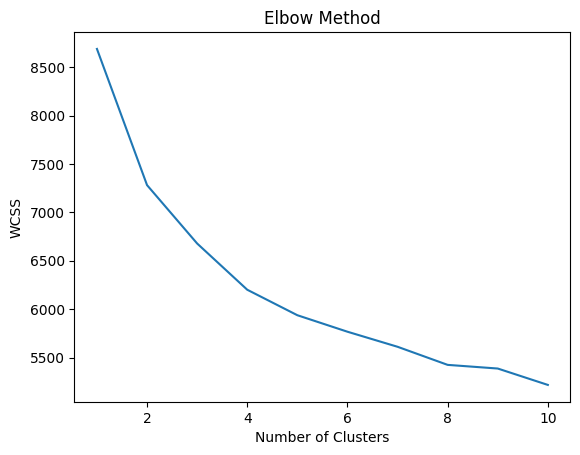

In [24]:
# find the best number of clusters with elbow method or silhouette score
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(industry_topic_matrix_normalized.T)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

#the angle starts smoothening on cluster 4

In [25]:
# We use KMeans to identify groups of topics and we transpose the data 
# to cluster the topics, not the industries

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(industry_topic_matrix_normalized.T)
labels = kmeans.labels_

# Creating DataFrame with topic and their corresponding cluster
topic_clusters = pd.DataFrame({'topic_id': industry_topic_matrix.columns, 'cluster': labels})

print("Topics grouped by cluster:")
print(topic_clusters.head(20).sort_values(by='cluster'))

# we can see the groups

Topics grouped by cluster:
    topic_id  cluster
17        17        0
16        16        0
8          8        0
18        18        0
9          9        1
15        15        1
14        14        1
13        13        1
12        12        1
10        10        1
19        19        1
5          5        1
4          4        1
6          6        2
3          3        2
1          1        2
7          7        2
0          0        2
11        11        3
2          2        3


C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


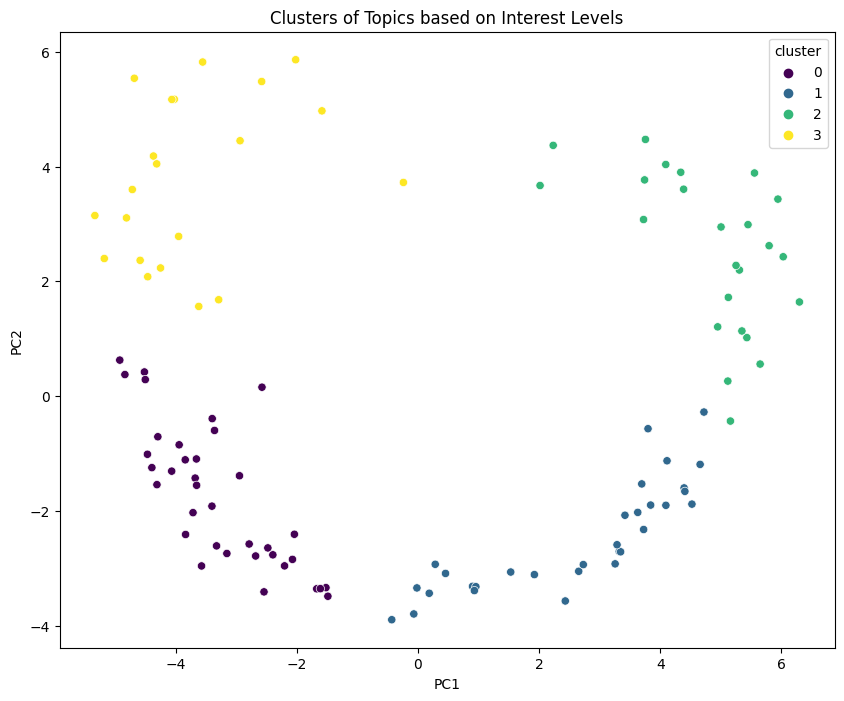

In [26]:
# PCA is used for reducing the dimentionality and visualizing the clusters 

pca = PCA(n_components=2) # Linear Relationships
principal_components = pca.fit_transform(industry_topic_matrix_normalized.T)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = labels
pca_df['topic_id'] = industry_topic_matrix.columns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis')
plt.title('Clusters of Topics based on Interest Levels')
plt.show()

# PCA shows that groups are well-separated based on their features
# PC1 and PC2 are the directions in which the variance in the data is maximized
# The proportion of variance in PC1 and PC2 can tell how much of the total variance in your data is captured
# The separation of these 4 groups show feature contribution effectively differentiate between the groups

In [27]:
# the visualization shows perfect result of identifying each cluster group and they have no intersection


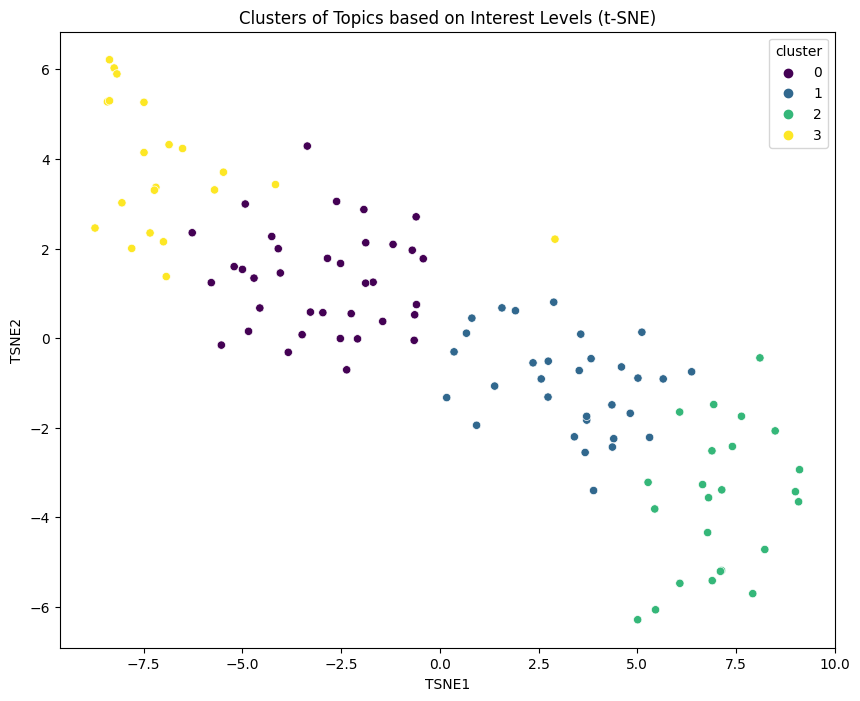

In [28]:
tsne = TSNE(n_components=2, random_state=42) # Non-Linear Relationships
tsne_results = tsne.fit_transform(industry_topic_matrix_normalized.T)


tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['cluster'] = labels
tsne_df['topic_id'] = industry_topic_matrix.columns


plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='cluster', palette='viridis', data=tsne_df)
plt.title('Clusters of Topics based on Interest Levels (t-SNE)')
plt.show()

Report
1. Analysis of Interest Levels
First I began with computing the mean and median interest levels across the dataset, revealing that the mean and median values are nearly identical, indicating a symmetric distribution of interest levels. Next, the interest levels are grouped by industry and topic to identify the most and least explored topics per industry. The most explored topics are sorted by interest level, highlighting the topics with the highest engagement within each industry. Similarly, the least explored topics are identified to understand areas with minimal interest.

2. Industry-Topic Matrix
An industry-topic matrix is constructed where rows represent industries, columns represent topics, and the values are the interest levels, filled with 0 for unexplored topics. This matrix provides a comprehensive view of how different industries engage with various topics.

3. Data Normalization and Clustering
The data is normalized to ensure each topic's interest level is on the same scale.

4. Kmeans
KMeans clustering is performed with four clusters to group topics based on normalized interest levels. 
The elbow method finds optimal number of clusters.

5. Visualization of Clusters
PCA Visualization
Principal Component Analysis (PCA) is used to reduce the dimensionality of the data and visualize the clusters. This visualization helps identify linear relationships between clusters.

Also, t-SNE  is applied to capture non-linear relationships and provide an alternative visualization of the clusters.